In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

from matplotlib.patches import Rectangle

% matplotlib inline

In [2]:
data = pd.read_csv('EP signals from dIm EP and dR RT.csv')

# Add 'Bad' columns
bad_indices = [int(x) for x in np.genfromtxt("bad spots.txt", delimiter="\n")]
binary_bad = [False] * len(data)
for i in bad_indices:
    binary_bad[i] = True

data['Streptavidin Bad EP'] = binary_bad
data['Streptavidin Bad RT'] = (data['Streptavidin Association SNR'].isnull())
data['Peptide Weight']      = data['Peptide'].map(pep.weight)
data['Peptide Length']      = data['Peptide'].map(lambda x : len(str(x)))

data = data[['Grid Index',
             'Peptide',
             'Peptide Length',
             'Peptide Weight',
                       
             'Peptide Readout',
             'Peptide Median',
             'Peptide MAD',

             'Streptavidin Bad EP',
             'Streptavidin Bad RT',
             
             'Streptavidin Readout',
             'Streptavidin Median',
             'Streptavidin MAD',
            
             'Streptavidin Dissociation Mean',
             'Streptavidin Baseline Noise',
             
             'a-Myc Readout',
             'a-Myc Median',
             'a-Myc MAD',
            
             'a-Myc Dissociation Mean',
             'a-Myc Baseline Noise']]

data.head()

,Grid Index,Peptide,Peptide Length,Peptide Weight,Peptide Readout,Peptide Median,Peptide MAD,Streptavidin Bad EP,Streptavidin Bad RT,Streptavidin Readout,Streptavidin Median,Streptavidin MAD,Streptavidin Dissociation Mean,Streptavidin Baseline Noise,a-Myc Readout,a-Myc Median,a-Myc MAD,a-Myc Dissociation Mean,a-Myc Baseline Noise
0,0,WTHPQFAT,8,987.083,0.000387,0.000924,0.000241,False,False,0.001759,0.001743,0.000143,0.001104,0.000211,-0.000085,-0.000013,0.000039,0.000144,0.000192
1,1,WTHPQFAT,8,987.083,0.000360,0.000659,0.000338,False,False,0.001839,0.001741,0.000107,0.000765,0.000263,-0.000015,-0.000013,0.000043,0.000080,0.000168
2,2,WTHLQFAT,8,1003.126,0.000223,0.000311,0.000148,False,False,-0.000018,0.000024,0.000095,0.000072,0.000237,0.000124,0.000046,0.000035,-0.000223,0.000120
3,3,NGQFQVWIPLAQK,13,1528.777,0.002042,0.001970,0.000265,False,False,-0.000196,-0.000035,0.000107,-0.000145,0.000237,0.000100,0.000175,0.000054,0.000093,0.000216
4,4,LQLHPQAGK,9,991.160,0.003436,0.003363,0.000187,False,False,0.000476,0.000593,0.000101,0.000319,0.000237,0.000036,0.000103,0.000034,0.000032,0.000239


# Streptavidin dR RT vs Streptavidin dIm EP

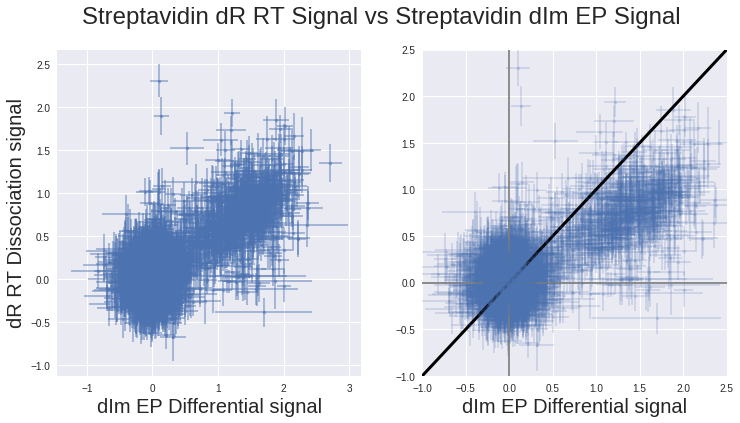

In [3]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dR RT Signal vs Streptavidin dIm EP Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Streptavidin Readout'] * 1000,
             y = data['Streptavidin Dissociation Mean'] * 1000,
             xerr = data['Streptavidin MAD'] * 1000,
             yerr = data['Streptavidin Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel('dR RT Dissociation signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Streptavidin Readout'] * 1000,
             y = data['Streptavidin Dissociation Mean'] * 1000,
             xerr = data['Streptavidin MAD'] * 1000,
             yerr = data['Streptavidin Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.2)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
# plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1, 2.5))
plt.ylim((-1, 2.5))
plt.show()

# a-Myc dR RT vs a-Myc dIm EP

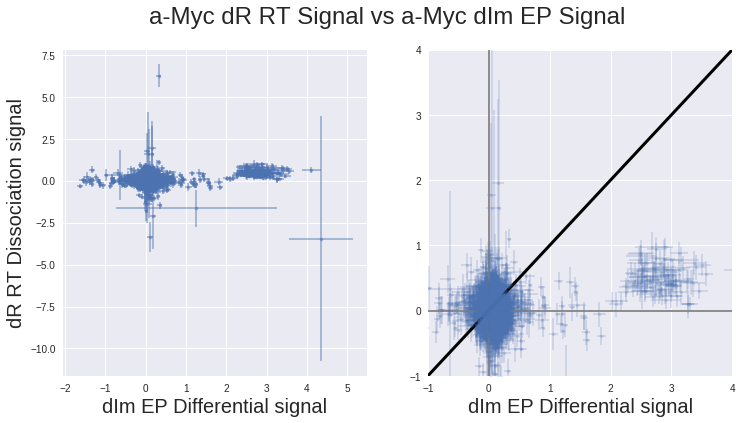

In [4]:
plt.figure(figsize = (12, 6))
plt.suptitle('a-Myc dR RT Signal vs a-Myc dIm EP Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['a-Myc Readout'] * 1000,
             y = data['a-Myc Dissociation Mean'] * 1000,
             xerr = data['a-Myc MAD'] * 1000,
             yerr = data['a-Myc Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel('dR RT Dissociation signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['a-Myc Readout'] * 1000,
             y = data['a-Myc Dissociation Mean'] * 1000,
             xerr = data['a-Myc MAD'] * 1000,
             yerr = data['a-Myc Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.2)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
# plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-1, 4))
plt.ylim((-1, 4))
plt.show()

# Streptavidin dIm EP vs Peptide dIm EP

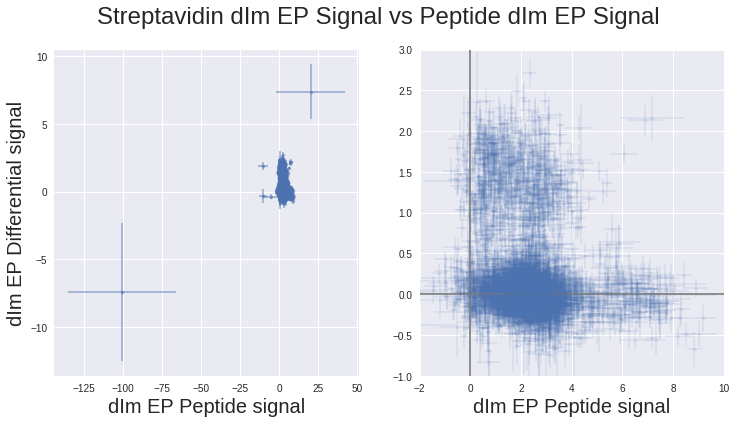

In [5]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dIm EP Signal vs Peptide dIm EP Signal', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Peptide Readout'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Peptide MAD'] * 1000,
             yerr = data['Streptavidin MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Peptide Readout'] * 1000,
             y = data['Streptavidin Readout'] * 1000,
             xerr = data['Peptide MAD'] * 1000,
             yerr = data['Streptavidin MAD'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.1)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
# plt.ylabel('dIm EP Differential signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.xlim((-2, 10))
plt.ylim((-1, 3))
plt.show()

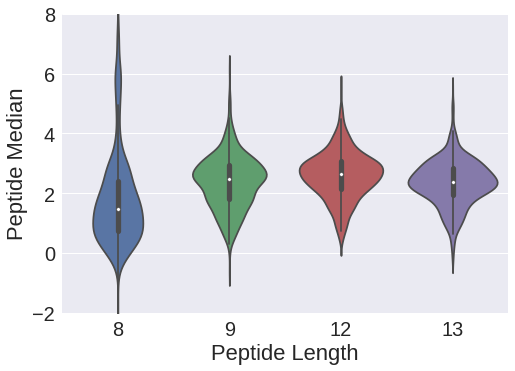

In [6]:
sns.set_context('notebook')
sns.set(font_scale = 2)

mask = (data['Peptide Length'].isin([8, 9, 12, 13])) & (~data['Streptavidin Bad EP'])
sns.violinplot(x = data['Peptide Length'][mask],
               y = data['Peptide Median'][mask] * 1000,
               order = [8, 9, 12, 13])
plt.ylim((-2, 8))
plt.show()

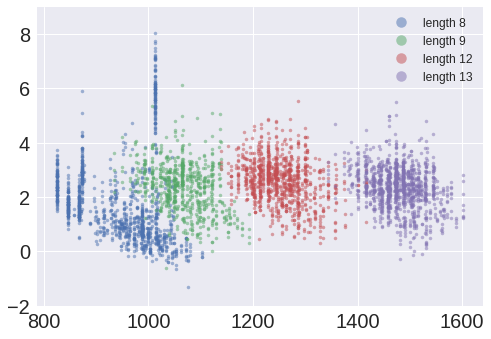

In [7]:
for length in [8, 9, 12, 13]:
    mask = (data['Peptide Length'] == length) & (~data['Streptavidin Bad EP'])
    plt.plot(data[mask]['Peptide Weight'],
             data[mask]['Peptide Median'] * 1000,
             marker = '.',
             linestyle = 'none',
             alpha = 0.5,
             label = 'length ' + str(length))
plt.ylim((-2, 9))
plt.legend(markerscale = 3, fontsize = 12)
plt.show()

# Aggregate by peptide
# Use only scrubbed 8- and 9-peptide curves

In [8]:
data_ep = pd.read_csv('12 EP dIm Signals.csv')
data_ep = data_ep[['Peptide',
                   'Peptide Mean', 'Peptide SE',
                   'Streptavidin Mean', 'Streptavidin SE']]

data_ep['Peptide Length'] = data_ep['Peptide'].apply(len)
data_ep['Peptide Weight'] = data_ep['Peptide'].apply(pep.weight)

data_ep.head()

,Peptide,Peptide Mean,Peptide SE,Streptavidin Mean,Streptavidin SE,Peptide Length,Peptide Weight
0,ATHPQFAT,0.001384,0.000084,0.001445,0.000100,8,871.949
1,CTHPQFAT,0.001125,0.000035,0.001317,0.000129,8,904.009
2,DTHPQFAT,0.001391,0.000062,0.001412,0.000073,8,915.959
3,DYKDDDDK,0.005810,0.000087,-0.000086,0.000009,8,1012.984
4,ETHPQFAT,0.001740,0.000131,0.001277,0.000064,8,929.986


In [9]:
data_rt = pd.read_csv('06 Aggregated dR RT Streptavidin length 8 and 9.csv')
data_rt = data_rt[['Peptide', 'Dissoc Signal Mean', 'Dissoc Signal SE']]
data_rt.rename(columns = {'Dissoc Signal Mean' : 'Streptavidin Dissociation',
                          'Dissoc Signal SE'   : 'Streptavidin Dissociation SE'}, inplace = True)
data_rt['Streptavidin Dissociation SE'] = data_rt['Streptavidin Dissociation SE'].fillna(0)
data_rt.head()

,Peptide,Streptavidin Dissociation,Streptavidin Dissociation SE
0,ATHPQFAT,0.000713,0.000080
1,CTHPQFAT,0.000734,0.000067
2,DTHPQFAT,0.000952,0.000038
3,ETHPQFAT,0.000853,0.000351
4,FTHPQFAT,0.000893,0.000125


# Merge on peptide name

In [10]:
data = pd.merge(data_ep, data_rt, on = 'Peptide', how = 'inner')
data.head()

,Peptide,Peptide Mean,Peptide SE,Streptavidin Mean,Streptavidin SE,Peptide Length,Peptide Weight,Streptavidin Dissociation,Streptavidin Dissociation SE
0,ATHPQFAT,0.001384,0.000084,0.001445,0.000100,8,871.949,0.000713,0.000080
1,CTHPQFAT,0.001125,0.000035,0.001317,0.000129,8,904.009,0.000734,0.000067
2,DTHPQFAT,0.001391,0.000062,0.001412,0.000073,8,915.959,0.000952,0.000038
3,ETHPQFAT,0.001740,0.000131,0.001277,0.000064,8,929.986,0.000853,0.000351
4,FTHPQFAT,0.000997,0.000050,0.001673,0.000048,8,948.047,0.000893,0.000125


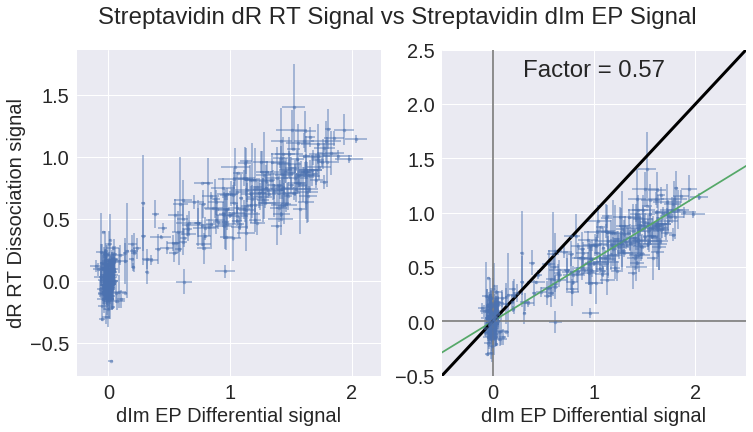

In [11]:
plt.figure(figsize = (12, 6))
plt.suptitle('Streptavidin dR RT Signal vs Streptavidin dIm EP Signal ', fontsize = 24)

plt.subplot(1,2,1)
plt.errorbar(x = data['Streptavidin Mean'] * 1000,
             y = data['Streptavidin Dissociation'] * 1000,
             xerr = data['Streptavidin SE'] * 1000,
             yerr = data['Streptavidin Dissociation SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.xlabel('dIm EP Differential signal', fontsize = 20)
plt.ylabel('dR RT Dissociation signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Streptavidin Mean'] * 1000,
             y = data['Streptavidin Dissociation'] * 1000,
             xerr = data['Streptavidin SE'] * 1000,
             yerr = data['Streptavidin Dissociation SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)

a, _, _, _ = np.linalg.lstsq(data['Streptavidin Mean'][:,np.newaxis], data['Streptavidin Dissociation'])
plt.plot([-10, 10], [- a * 10, a * 10])
plt.title('Factor = ' + str(round(a[0], 2)), y = 0.9)

plt.xlabel('dIm EP Differential signal', fontsize = 20)
#plt.ylabel('dR RT Dissociation signal', fontsize = 20)
plt.plot([0,0], [-10, 10], 'grey')
plt.plot([-10,10], [0,0], 'grey')
plt.plot([-10,10], [-10,10], 'k-', lw = 3)
plt.xlim((-0.5, 2.5))
plt.ylim((-0.5, 2.5))
plt.show()

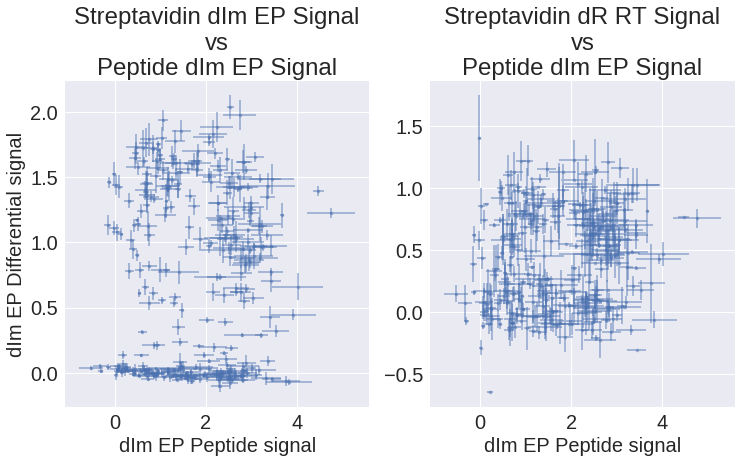

In [12]:
plt.figure(figsize = (12, 6))


plt.subplot(1,2,1)
plt.errorbar(x = data['Peptide Mean'] * 1000,
             y = data['Streptavidin Mean'] * 1000,
             xerr = data['Peptide SE'] * 1000,
             yerr = data['Streptavidin SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.title('Streptavidin dIm EP Signal\nvs\nPeptide dIm EP Signal', fontsize = 24)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
plt.ylabel('dIm EP Differential signal', fontsize = 20)

plt.subplot(1,2,2)
plt.errorbar(x = data['Peptide Mean'] * 1000,
             y = data['Streptavidin Dissociation'] * 1000,
             xerr = data['Peptide SE'] * 1000,
             yerr = data['Streptavidin Dissociation SE'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.5)
plt.title('Streptavidin dR RT Signal\nvs\nPeptide dIm EP Signal', fontsize = 24)
plt.xlabel('dIm EP Peptide signal', fontsize = 20)
# plt.ylabel('dR RT Streptavidin signal', fontsize = 20)
plt.show()

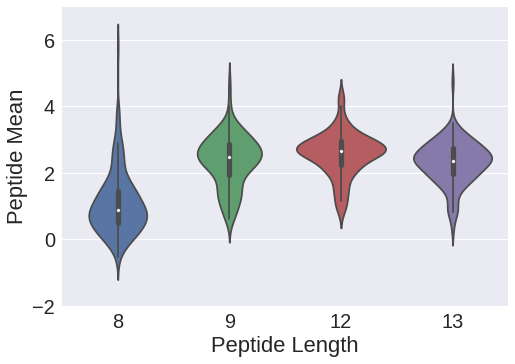

In [13]:
mask = data_ep['Peptide Length'].isin([8, 9, 12, 13])
sns.violinplot(x = data_ep['Peptide Length'][mask],
               y = data_ep['Peptide Mean'][mask] * 1000,
               order = [8, 9, 12, 13])
plt.ylim((-2, 7))
plt.show()

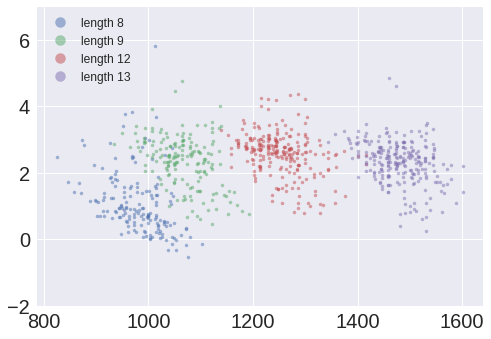

In [14]:
for length in [8, 9, 12, 13]:
    mask = (data_ep['Peptide Length'] == length)
    plt.plot(data_ep[mask]['Peptide Weight'],
             data_ep[mask]['Peptide Mean'] * 1000,
             marker = '.',
             linestyle = 'none',
             alpha = 0.5,
             label = 'length ' + str(length))
plt.ylim((-2, 7))
plt.legend(markerscale = 3, fontsize = 12)
plt.show()

In [15]:
data_ep[data_ep['Peptide Weight'] < 900]

,Peptide,Peptide Mean,Peptide SE,Streptavidin Mean,Streptavidin SE,Peptide Length,Peptide Weight
0,ATHPQFAT,0.001384,0.000084,0.001445,0.000100,8,871.949
6,GTHPQFAT,0.001430,0.000073,0.001542,0.000097,8,857.922
10,LQHPQAGK,0.002834,0.000131,0.000552,0.000063,8,878.000
21,PTHPQFAT,0.001177,0.000197,0.001407,0.000021,8,897.987
22,QGRNSPAP,0.002472,0.000052,-0.000010,0.000007,8,825.881
26,STHPQFAT,0.001140,0.000110,0.001419,0.000062,8,887.948
27,TKIPTPIV,0.001691,0.000043,0.000008,0.000006,8,868.086
28,TKTSPLNS,0.001741,0.000040,-0.000028,0.000007,8,846.936
30,VKLTALND,0.002977,0.000066,-0.000035,0.000007,8,873.019
122,WTHPQGAT,0.002239,0.000206,0.000735,0.000033,8,896.958
